# Project
Ryan Leong, 1706969,

## Imports


In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sys

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
labelEncoder = LabelEncoder()

from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
estimator = SVR(kernel="linear")
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


In [2]:
#import data
trainData = pd.read_csv("train.csv") # passenger data + survival outcome
testData = pd.read_csv("test.csv")# passenger data - survival outcome
gender_submission = pd.read_csv("gender_submission.csv")# data submission example

## Settings

In [3]:
np.set_printoptions(threshold=sys.maxsize)
plt.rcdefaults()

## Brief Look at Data

In [4]:
#peaking training data
trainData # tag explanations: sibSp = # of siblings/spouses onboard, 
          # Parch =  # of parents or children onboard,Embarked= port of boarding

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
#peaking test data
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Start of Data Analysis

### info of Training Data Set

In [6]:
trainData.info()
trainData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
agePer = (177/891)*100
cabPer = (687/891)*100
emPer = (2/891)*100
print(round(agePer,2),"%")
print(round(cabPer,2),"%")
print(round(emPer,2),"%")

filteredTrainData = trainData[trainData['Embarked'].notnull()]
print(len(filteredTrainData))

19.87 %
77.1 %
0.22 %
889


### Null Value fields

In [9]:
survivors = filteredTrainData[filteredTrainData['Survived'] == 1]
deaths = filteredTrainData[filteredTrainData['Survived']==0]

In [10]:
survivors.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             52
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          206
Embarked         0
dtype: int64

In [11]:
deaths.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            125
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          481
Embarked         0
dtype: int64

#####  Discussion of Missing Values Fields
The 3 fields that have missing values are:
- Age, 177 Missing Entries, 19.87% of the training set
- Cabin, 687 Missing Entries, 77% of the training set
- Embarked, 2 Missing Entries, 0.22% of the training set

of the Survivors :
- 52 survivors have missing age information
- 206 survivors have missing Cabin information
- 2 surivors have missing embarkation information

Given that there are only 0.22% missing values for embarked, the missing data should be neglible. This is further proved by the similar ratio in both deaths and survivors according to the place of embarkation.

The Age file has 20% missing values which may be a concern when analysing its correlation to survival.

Cabin has the most missing information, however while Cabin information can used to identify where a passenger may be sleeping on the ship, it does not account for their location during the sinking since passengers are not limited soley to their cabin.
The Cabin field along side the pclass field may have a more definitive theory on where a passenger is likely to be on the titanic which may have more of an influence on who survived.

#### Embarkation

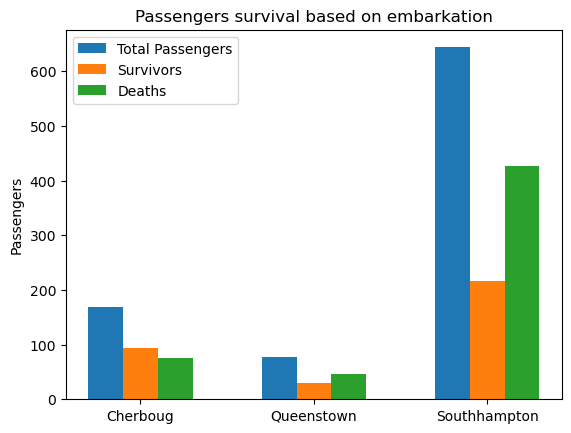

embarkation survival rate
Cherboug: 55.36 %
Queenstown: 38.96 %
Southhampton: 33.7 %


In [12]:
Cherboug = filteredTrainData[filteredTrainData["Embarked"]=='C']
Queenstown = filteredTrainData[filteredTrainData["Embarked"]=='Q']
Southhampton = filteredTrainData[filteredTrainData["Embarked"]=='S']
embPassengers = [len(Cherboug),len(Queenstown),len(Southhampton)]


CherbougS = survivors[survivors["Embarked"]=='C']
QueenstownS = survivors[survivors["Embarked"]=='Q']
SouthhamptonS = survivors[survivors["Embarked"]=='S']
embarkSurvivors = [len(CherbougS),len(QueenstownS),len(SouthhamptonS)]

CherbougD = deaths[deaths["Embarked"]=='C']
QueenstownD = deaths[deaths["Embarked"]=='Q']
SouthhamptonD = deaths[deaths["Embarked"]=='S']
embarkDeaths = [len(CherbougD),len(QueenstownD),len(SouthhamptonD)]
spacing = np.arange(3)
labels =['Cherboug','Queenstown','Southhampton']

plt.bar(spacing-0.2,embPassengers,0.2,label="Total Passengers")
plt.bar(spacing,embarkSurvivors,0.2,label="Survivors")
plt.bar(spacing + 0.2,embarkDeaths,0.2,label="Deaths")
plt.xticks(spacing, labels)
plt.ylabel('Passengers')
plt.title('Passengers survival based on embarkation')
plt.legend()
plt.show()

cPer = round(len(CherbougS)/len(Cherboug) * 100,2)
qPer = round(len(QueenstownS)/len(Queenstown) * 100,2)
sPer = round(len(SouthhamptonS)/len(Southhampton)* 100,2)
print('embarkation survival rate')
print('Cherboug:',cPer,'%')
print('Queenstown:',qPer,'%')
print('Southhampton:',sPer,'%')

##### Embarkation Discussion
Looking at the graph, the number of survivors and deaths seem to be directly proportional to the number of passengers on board. Cherboug has the highest survival rate, while southhampton has the lowest although this may be attributed to having the most passengers.

##### Age

Grouping of ages according to statistics canada
- 0-14
- 15-24
- 25-64
- 65+

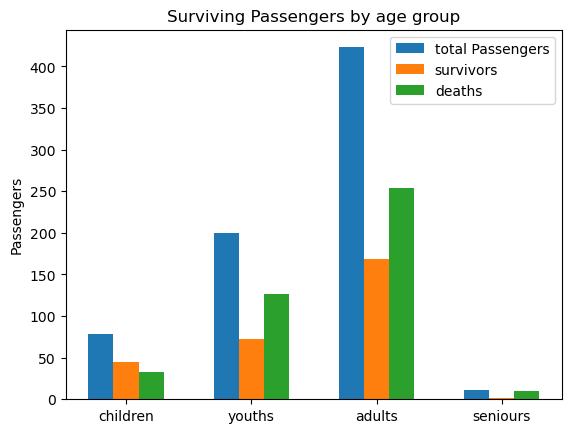

age survival Rates
children: 57.69 %
youths: 36.5 %
adults: 39.95 %
seniours: 9.09 %


In [13]:
children = filteredTrainData[filteredTrainData['Age']<15]
youths = filteredTrainData[(filteredTrainData['Age']>=15) & (filteredTrainData['Age']<25)]
adults = filteredTrainData[(filteredTrainData['Age']>=25) & (filteredTrainData['Age']<65)]
seniours = filteredTrainData[(filteredTrainData['Age']>=65)]

ageLabels = ['children','youths','adults','seniours']
ageSpacing = np.arange(4)
agePassengers = [len(children),len(youths),len(adults),len(seniours)]
ageSurvivors = [len(children[children['Survived'] == 1]),len(youths[youths['Survived'] == 1])
                ,len(adults[adults['Survived'] == 1]),len(seniours[seniours['Survived'] == 1])]
ageDeaths = [len(children[children['Survived'] == 0]),len(youths[youths['Survived'] == 0])
             ,len(adults[adults['Survived'] == 0]),len(seniours[seniours['Survived'] == 0])]   

plt.bar(ageSpacing-0.2,agePassengers,0.2,label='total Passengers')
plt.bar(ageSpacing,ageSurvivors,0.2,label='survivors')
plt.bar(ageSpacing+0.2,ageDeaths,0.2,label='deaths')
plt.xticks(ageSpacing,ageLabels)
plt.title('Surviving Passengers by age group')
plt.ylabel('Passengers')
plt.legend()
plt.show()

print('age survival Rates')
print('children:',round(len(children[children['Survived'] == 1])/len(children) * 100,2),"%")
print('youths:',round(len(youths[youths['Survived'] == 1])/len(youths) * 100,2),"%")
print('adults:',round(len(adults[adults['Survived'] == 1])/len(adults) * 100,2),"%")
print('seniours:',round(len(seniours[seniours['Survived'] == 1])/len(seniours) * 100,2),"%")

##### Age Discussion
There are more survivors among the children age group whereas the other age groups have higher death rates.
This may indicate a priority in saving young children. Adults has a slightly higher survival rate than youths and may be because of physical development and youths possibly having less assistance than children. Seniours have the highest mortality rate.  Bare in mind almost 20% of data is missing and could change this.

#### Gender

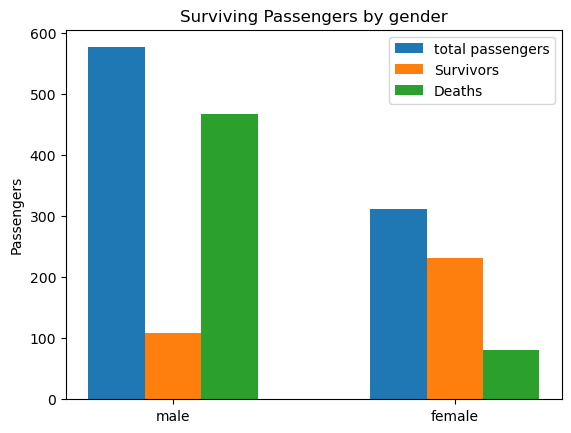

surivival rates by gender
male:  18.89 %
female:  74.04 %


In [14]:
men = filteredTrainData[filteredTrainData['Sex']=='male']
women = filteredTrainData[filteredTrainData['Sex']=='female']

maleSurvivors = men[men['Survived']==1]
femaleSurivors = women[women['Survived']==1]
maleDeaths = men[men['Survived']==0]
femaleDeaths = women[women['Survived']==0]

genderTotal = [len(men),len(women)]
genderSurvivors = [len(maleSurvivors),len(femaleSurivors)]
genderDeaths =[len(maleDeaths),len(femaleDeaths)]

genderLabel = ['male','female']
genderSpacing = np.arange(2)

plt.bar(genderSpacing-0.2,genderTotal,0.2,label = 'total passengers')
plt.bar(genderSpacing,genderSurvivors,0.2,label = 'Survivors')
plt.bar(genderSpacing+0.2,genderDeaths,0.2,label = 'Deaths')
plt.xticks(genderSpacing,genderLabel)
plt.title('Surviving Passengers by gender')
plt.ylabel('Passengers')
plt.legend()
plt.show()

malePer = round(len(maleSurvivors)/len(men) *100,2)
femalePer = round(len(femaleSurivors)/len(women) *100,2)

print('surivival rates by gender')
print('male: ',malePer,'%')
print('female: ',femalePer,'%')

##### Gender data discussion
Noticeably, the survival rate of female passengers is far above that of male passengers. Possible correlation to values of chivalry at the time. Birkenhead Drill " Women and Children First".

#### Correlation of gender and age

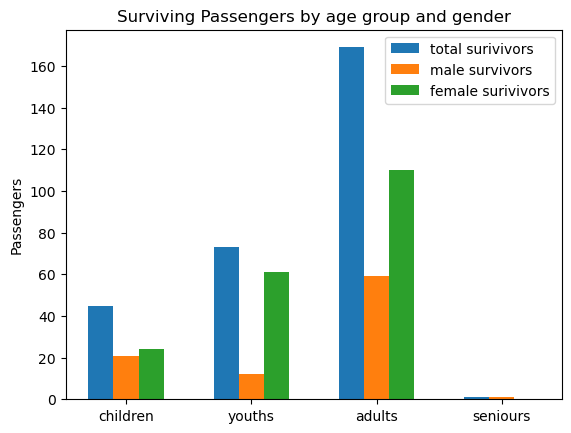

In [15]:
mSChild = children[(children['Survived'] == 1) & (children['Sex'] == 'male')]
mSYouth = youths[(youths['Survived'] == 1) & (youths['Sex'] == 'male')]
mSAdult = adults[(adults['Survived'] == 1) & (adults['Sex'] == 'male')]
mSSeniours = seniours[(seniours['Survived'] == 1) & (seniours['Sex'] == 'male')]

fSChild = children[(children['Survived'] == 1) & (children['Sex'] == 'female')]
fSYouth = youths[(youths['Survived'] == 1) & (youths['Sex'] == 'female')]
fSAdult = adults[(adults['Survived'] == 1) & (adults['Sex'] == 'female')]
fSSeniours = seniours[(seniours['Survived'] == 1) & (seniours['Sex'] == 'female')]

mAgeSurvivors = [len(mSChild),len(mSYouth),len(mSAdult),len(mSSeniours)]
fAgeSurvivors = [len(fSChild),len(fSYouth),len(fSAdult),len(fSSeniours)]



plt.bar(ageSpacing-0.2,ageSurvivors,0.2,label="total surivivors")
plt.bar(ageSpacing,mAgeSurvivors,0.2,label="male survivors")
plt.bar(ageSpacing+0.2,fAgeSurvivors,0.2,label="female surivivors")
plt.title('Surviving Passengers by age group and gender')
plt.ylabel('Passengers')
plt.xticks(ageSpacing,ageLabels)
plt.legend()
plt.show()

##### Discussion of survival rate based on age and gender
The Seniour age group is small enough to be neglible.

In all other age groups there are more female survivors than male.
only youths and adults age group shows a clear higher number of female survivors than male
the survival rate for children is more equal around gender.
It is possible that the priority of was children>female>male>seniors. Seniours may be an outlier as their mortality rate is also influenced by whether they could survive condiitions on safety boats.


#### Influence of having family on board
##### Parent Child 
This column may prove to be a bit difficult in gaining any useful data as we have already seen that children have a higher survival rate, with adults and seniours having the lowest survival rates (~40% and ~9%). The parch col does not group passengers by family units. we can assume that a passenger has a parent or child based on age. additionally not all children on board were accompanied by their parents

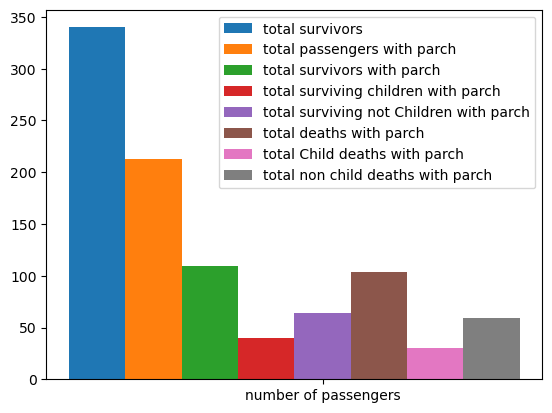

In [16]:
parch = filteredTrainData[(filteredTrainData['Parch'] > 0)]
parchS = parch[(parch['Survived'] == 1)]
parchD = parch[(parch['Survived'] == 0)]
parchChild = parch[parch['Age']<15]
parchSChild = parchS[parchS['Age']<15]
parchDChild = parchD[parchD['Age']<15]
parchSNChild = parchS[parchS['Age']>=15]
parchDNChild = parchD[parchD['Age']>=15]

parchSpacing = np.arange(1)
parchLabel = ['number of passengers']
plt.bar(parchSpacing-0.8,len(survivors),0.2,label="total survivors")
plt.bar(parchSpacing-0.6,len(parch),0.2,label="total passengers with parch")
plt.bar(parchSpacing-0.4,len(parchS),0.2,label="total survivors with parch")
plt.bar(parchSpacing-0.2,len(parchSChild),0.2,label="total surviving children with parch")
plt.bar(parchSpacing,len(parchSNChild),0.2,label="total surviving not Children with parch")
plt.bar(parchSpacing+0.2,len(parchD),0.2,label="total deaths with parch")
plt.bar(parchSpacing+0.4,len(parchDChild),0.2,label="total Child deaths with parch")
plt.bar(parchSpacing+0.6,len(parchDNChild),0.2,label="total non child deaths with parch")
plt.xticks(parchSpacing,parchLabel)
plt.legend()
plt.show()

In [17]:
parch.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,213.000000,213.000000,213.000000,193.000000,213.000000,213.000000,213.000000
mean,448.370892,0.511737,2.267606,23.006062,1.431925,1.596244,53.268154
std,261.701920,0.501040,0.834816,17.145160,1.796568,0.882954,64.656501
min,8.000000,0.000000,1.000000,0.420000,0.000000,1.000000,7.229200
25%,206.000000,0.000000,2.000000,7.000000,0.000000,1.000000,20.525000
50%,438.000000,1.000000,3.000000,22.000000,1.000000,1.000000,29.125000
75%,680.000000,1.000000,3.000000,36.000000,2.000000,2.000000,57.979200
max,889.000000,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200



child survivors with parents: 40
child survivors without parents: 45


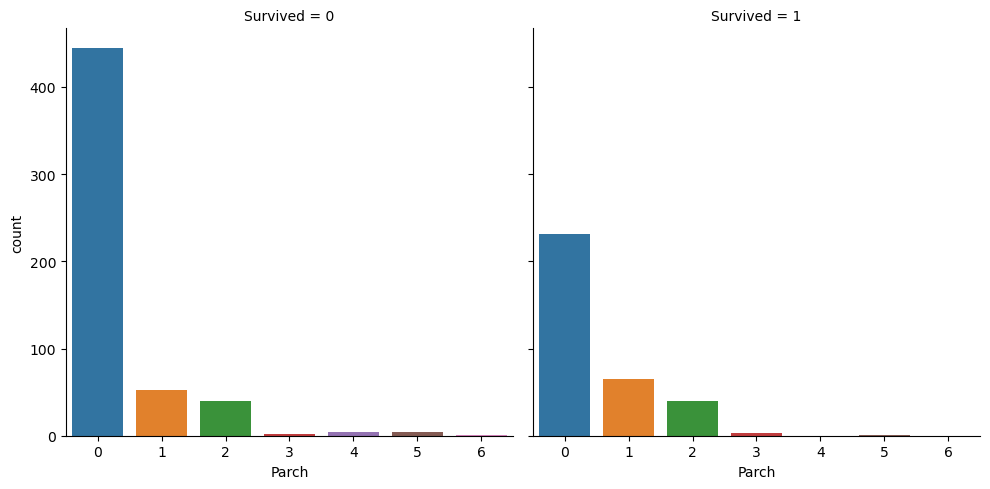

In [18]:
print()
print('child survivors with parents:',len(parchSChild))
print('child survivors without parents:',len(children[children['Survived'] == 1]))
                                                
sns.catplot(x = 'Parch',col = 'Survived',kind = 'count',data = filteredTrainData)

#### Parch Discussion
We can see that there is almost a 50/50 split between survivors and deaths regarding passengers with either parent or child. Additionally the children are in the minority for both survivors and deaths. we see that most of the children survivors were with their parents, the other 5 are possibly taken care of by other people or their baby sitter as mentioned in the kaggle data section. the ratio of children to non children survivors and deaths are similar. 
Given the small size of passengers with more than 3 parent/children its hard to say if more parch lowered survivalbility.
we see that there is a almost 50/50 split except when there are no parch

#### Sibling and Spouse Passengers

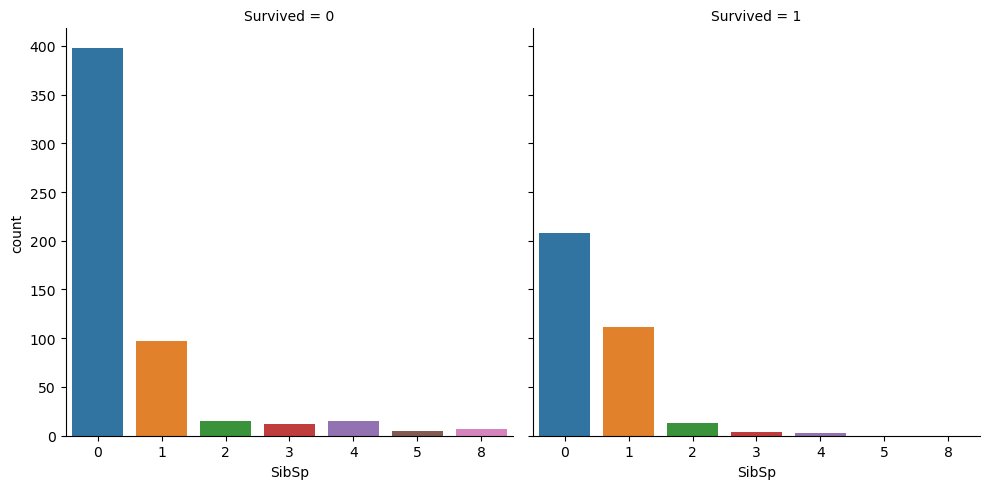

In [19]:
sns.catplot(x = 'SibSp',col = 'Survived',data = filteredTrainData,kind = 'count',)

#### SibSP Discussion

It seems that having no spiblings or spouses on board have a less likely chance to survive

#### Passenger Class

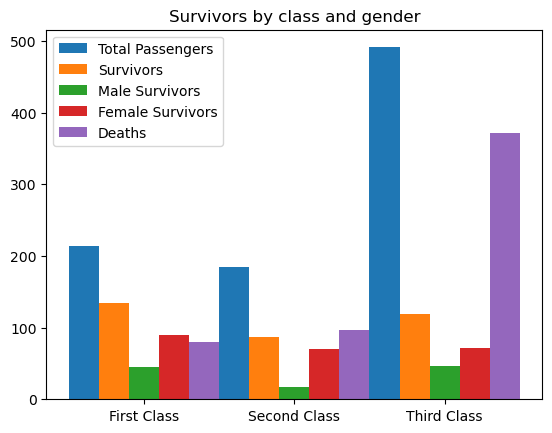

First Class survival rate: 63 %
second Class survival rate: 47 %
third Class survival rate: 24 %


In [20]:
firstC = filteredTrainData[filteredTrainData['Pclass'] == 1]
secC =  filteredTrainData[filteredTrainData['Pclass'] == 2]
thirdC =  filteredTrainData[filteredTrainData['Pclass'] == 3]
totals = [len(firstC),len(secC),len(thirdC)]
firstSurv = firstC[firstC['Survived']==1]
secSurv = secC[secC['Survived']==1]
thirdSurv = thirdC[thirdC['Survived']==1]
classSurv = [len(firstSurv),len(secSurv),len(thirdSurv)]

firstSurvChild = firstSurv[firstSurv['Age']<15]
secSurvChild = secSurv[secSurv['Age']<15]
thirdSurvChild = thirdSurv[thirdSurv['Age']<15]
classSurvChild = [len(firstSurvChild),len(secSurvChild),len(thirdSurvChild)]

firstSurvM = firstSurv[firstSurv['Sex'] == 'male']
secSurvM = secSurv[secSurv['Sex']== 'male']
thirdSurvM = thirdSurv[thirdSurv['Sex']== 'male']
classSurvM = [len(firstSurvM),len(secSurvM),len(thirdSurvM)]

firstSurvF = firstSurv[firstSurv['Sex']== 'female']
secSurvF = secSurv[secSurv['Sex']== 'female']
thirdSurvF = thirdSurv[thirdSurv['Sex']== 'female']
classSurvF = [len(firstSurvF),len(secSurvF),len(thirdSurvF)]

firstDeath = firstC[firstC['Survived']==0]
secDeath = secC[secC['Survived']==0]
thirdDeath =  thirdC[thirdC['Survived']==0]
classDeaths = [len(firstDeath),len(secDeath),len(thirdDeath)]
classSpacing = np.arange(3)
classLabel =['First Class','Second Class','Third Class']

plt.bar(classSpacing-0.4,totals,0.2,label="Total Passengers")
plt.bar(classSpacing-0.2,classSurv,0.2,label="Survivors")
plt.bar(classSpacing,classSurvM,0.2,label="Male Survivors")
plt.bar(classSpacing+0.2,classSurvF,0.2,label="Female Survivors")
plt.bar(classSpacing+0.4,classDeaths,0.2,label="Deaths")
plt.xticks(classSpacing,classLabel)
plt.legend()
plt.title('Survivors by class and gender')
plt.show()

firstPer = round(len(firstSurv)/len(firstC) * 100)
secPer = round(len(secSurv)/len(secC) * 100)
thirdPer = round(len(thirdSurv)/len(thirdC) * 100)
print('First Class survival rate:',firstPer,'%')
print('second Class survival rate:',secPer,'%')
print('third Class survival rate:',thirdPer,'%')

#### Feature Selection

In [21]:
newTrainingData = filteredTrainData[['Survived','Pclass','Sex','Age','SibSp','Parch']]
newTrainingData = newTrainingData.dropna()

In [22]:
newTrainingData.describe()

,Survived,Pclass,Age,SibSp,Parch
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584
std,0.491139,0.836854,14.492933,0.930692,0.854181
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000


In [23]:
newTrainingData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 38.9+ KB


In [24]:
newTrainingData.iloc[:,2]=labelEncoder.fit_transform(newTrainingData.iloc[:,2])
print("1 = male, 0 = female")
print(newTrainingData)

1 = male, 0 = female
     Survived  Pclass  Sex   Age  SibSp  Parch
0           0       3    1  22.0      1      0
1           1       1    0  38.0      1      0
2           1       3    0  26.0      0      0
3           1       1    0  35.0      1      0
4           0       3    1  35.0      0      0
..        ...     ...  ...   ...    ...    ...
885         0       3    0  39.0      0      5
886         0       2    1  27.0      0      0
887         1       1    0  19.0      0      0
889         1       1    1  26.0      0      0
890         0       3    1  32.0      0      0

[712 rows x 6 columns]


In [25]:
inputTestData = testData[['Pclass','Sex','Age','SibSp','Parch']]
inputTestData = inputTestData.dropna()
inputTestData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 415
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  332 non-null    int64  
 1   Sex     332 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   332 non-null    int64  
 4   Parch   332 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 15.6+ KB


#### Splitting training set into input and output and matching Test data size of 332 entries

In [26]:
trainInput = newTrainingData.iloc[:,1:6]
trainOutput = newTrainingData.iloc[:,0]

print(trainInput)
print(trainOutput)

     Pclass  Sex   Age  SibSp  Parch
0         3    1  22.0      1      0
1         1    0  38.0      1      0
2         3    0  26.0      0      0
3         1    0  35.0      1      0
4         3    1  35.0      0      0
..      ...  ...   ...    ...    ...
885       3    0  39.0      0      5
886       2    1  27.0      0      0
887       1    0  19.0      0      0
889       1    1  26.0      0      0
890       3    1  32.0      0      0

[712 rows x 5 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64


#### Setting test set for input and output

In [27]:
inputTestData.iloc[:,1]=labelEncoder.fit_transform(inputTestData.iloc[:,1])
print(inputTestData)

     Pclass  Sex   Age  SibSp  Parch
0         3    1  34.5      0      0
1         3    0  47.0      1      0
2         2    1  62.0      0      0
3         3    1  27.0      0      0
4         3    0  22.0      1      1
..      ...  ...   ...    ...    ...
409       3    0   3.0      1      1
411       1    0  37.0      1      0
412       3    0  28.0      0      0
414       1    0  39.0      0      0
415       3    1  38.5      0      0

[332 rows x 5 columns]


#### Normalizing Data

In [28]:
transformer = Normalizer().fit(trainInput)
trainInput=transformer.transform(trainInput)
inputTestData=transformer.transform(inputTestData)
print('training')
print(trainInput)
print('validation')
print(inputTestData)

training
[[0.13483997 0.04494666 0.98882646 0.04494666 0.        ]
 [0.02629758 0.         0.9993082  0.02629758 0.        ]
 [0.11462411 0.         0.99340894 0.         0.        ]
 [0.02854813 0.         0.99918467 0.02854813 0.        ]
 [0.08536656 0.02845552 0.99594319 0.         0.        ]
 [0.01851217 0.01851217 0.99965724 0.         0.        ]
 [0.61237244 0.20412415 0.40824829 0.61237244 0.20412415]
 [0.11013346 0.         0.99120118 0.         0.07342231]
 [0.14106912 0.         0.98748386 0.07053456 0.        ]
 [0.57735027 0.         0.76980036 0.19245009 0.19245009]
 [0.01723882 0.         0.9998514  0.         0.        ]
 [0.14815944 0.04938648 0.9877296  0.         0.        ]
 [0.07602859 0.02534286 0.9883717  0.02534286 0.12671432]
 [0.20952909 0.         0.97780241 0.         0.        ]
 [0.03633962 0.         0.9993395  0.         0.        ]
 [0.53881591 0.1796053  0.3592106  0.71842121 0.1796053 ]
 [0.09627458 0.         0.99483734 0.03209153 0.        ]
 [0.0

#### Models and functions


In [29]:
def trainModels(trainInput,trainOutput):# 
    #logistic Regression
    logReg = LogisticRegression(random_state=0).fit(trainInput,trainOutput)
    
    #Linear Discriminant analysis
    lda = LinearDiscriminantAnalysis().fit(trainInput,trainOutput)
    
    # k Nearist Neighbours
    neighbours = 1
    kNN = KNeighborsClassifier(n_neighbors = neighbours).fit(trainInput,trainOutput)
    
    # SVM 
    ##linear
    svcL = SVC(random_state=0,kernel='linear').fit(trainInput,trainOutput)
    ## poly
    svcP= SVC(random_state=0,kernel='poly').fit(trainInput,trainOutput)
    ##sigmoid
    svcS= SVC(random_state=0,kernel='sigmoid').fit(trainInput,trainOutput)
    
    # Naive Bayes 
    ##Gaussian
    nBG = GaussianNB().fit(trainInput,trainOutput)
    ## Multinomial
    nBM = MultinomialNB().fit(trainInput,trainOutput)
    ## Complement
    nBCom = ComplementNB().fit(trainInput,trainOutput)

    # Classifier Tree
    treeClass = tree.DecisionTreeClassifier(max_depth = 5,criterion='entropy').fit(trainInput,trainOutput)
   

                                            
    print('Logistic Regression Training Accuracy ',round(logReg.score(trainInput,trainOutput),2) * 100,'%')
    print('Linear Discremenant Analysis Accuracy ',round(lda.score(trainInput,trainOutput),2) * 100,'%')
    print('K Nearest NeighBour Training Accuracy ',round(kNN.score(trainInput,trainOutput),2) * 100,'%')
    print('Support Vector Machines Linear Training Accuracy ',round(svcL.score(trainInput,trainOutput),2) * 100,'%')    
    print('Support Vector Machines Poly Training Accuracy ',round(svcP.score(trainInput,trainOutput),2) * 100,'%')   
    print('Support Vector Machines Sigmoid Training Accuracy ',round(svcS.score(trainInput,trainOutput),2) * 100,'%')   
    print('gaussian Naive Bayes Training Accuracy ',round(nBG.score(trainInput,trainOutput),2) * 100,'%')
    print('Multinomial Naive Bayes Training Accuracy ',round(nBM.score(trainInput,trainOutput),2) * 100,'%')
    print('Complement Naive Bayes Training Accuracy ',round(nBCom.score(trainInput,trainOutput),2) * 100,'%')
    print('Classifier Decision Tree Training Accuracy ',round(treeClass.score(trainInput,trainOutput),2) * 100,'%')
                                            
    return logReg,lda,kNN,svcL,svcP,svcS,nBG,nBM,nBCom,treeClass

#### Train Data Accuracy

- For KNN less neighbours improves accuracy, 1 = 91%, 5= 85%
- for SVM linear has the highest accuracy of 78, sigmoid lowest of 55
- for naive bayes skipped bernouli as it works with binary features
- for naive bayes, categorical highest of 82, multinomial lowest of 69
-

In [30]:
trainedModel = trainModels(trainInput,trainOutput) #trainInput,trainOutput
print(trainedModel)

modelNames =['Logistic Regression','Linear Discremenant Analysis','K Nearest NeighBour','Support Vector Machines Linear',
            'Support Vector Machines Poly','Support Vector Machines Sigmoid',
            'gaussian','Multinomial','Complement ','Classifier Decision Tree']

print()
print('real output')
print(trainOutput.values.tolist())#trainOutput


Logistic Regression Training Accuracy  62.0 %
Linear Discremenant Analysis Accuracy  65.0 %
K Nearest NeighBour Training Accuracy  92.0 %
Support Vector Machines Linear Training Accuracy  62.0 %
Support Vector Machines Poly Training Accuracy  64.0 %
Support Vector Machines Sigmoid Training Accuracy  60.0 %
gaussian Naive Bayes Training Accuracy  61.0 %
Multinomial Naive Bayes Training Accuracy  60.0 %
Complement Naive Bayes Training Accuracy  62.0 %
Classifier Decision Tree Training Accuracy  82.0 %
(LogisticRegression(random_state=0), LinearDiscriminantAnalysis(), KNeighborsClassifier(n_neighbors=1), SVC(kernel='linear', random_state=0), SVC(kernel='poly', random_state=0), SVC(kernel='sigmoid', random_state=0), GaussianNB(), MultinomialNB(), ComplementNB(), DecisionTreeClassifier(criterion='entropy', max_depth=5))

real output
[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 

In [31]:
for i in range(len(trainedModel)):
    print()
    print(modelNames[i])
    print(trainedModel[i].predict(inputTestData))


Logistic Regression
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]

Linear Discremenant Analysis
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0

#### test Data Accuracy

In [32]:
shortTrainedOutput = trainOutput.iloc[0:332]

for i in range(len(trainedModel)):
    cm = confusion_matrix(shortTrainedOutput,trainedModel[i].predict(inputTestData))#trainOutput,trainedModel[i].predict(inputTestData)
    TN,FP,FN,TP = cm.ravel()
    
    testDataAccuracy = (TP + TN)/(TP+TN+FN+FP) * 100
    
    print(cm)
    print('[{}] model Testing Accuracy:"{}"%'.format(modelNames[i],testDataAccuracy))
    print()

[[195   9]
 [126   2]]
[Logistic Regression] model Testing Accuracy:"59.337349397590366"%

[[183  21]
 [114  14]]
[Linear Discremenant Analysis] model Testing Accuracy:"59.337349397590366"%

[[117  87]
 [ 71  57]]
[K Nearest NeighBour] model Testing Accuracy:"52.40963855421686"%

[[196   8]
 [126   2]]
[Support Vector Machines Linear] model Testing Accuracy:"59.63855421686747"%

[[191  13]
 [123   5]]
[Support Vector Machines Poly] model Testing Accuracy:"59.036144578313255"%

[[191  13]
 [122   6]]
[Support Vector Machines Sigmoid] model Testing Accuracy:"59.337349397590366"%

[[189  15]
 [123   5]]
[gaussian] model Testing Accuracy:"58.43373493975904"%

[[201   3]
 [127   1]]
[Multinomial] model Testing Accuracy:"60.8433734939759"%

[[167  37]
 [107  21]]
[Complement ] model Testing Accuracy:"56.62650602409639"%

[[126  78]
 [ 77  51]]
[Classifier Decision Tree] model Testing Accuracy:"53.31325301204819"%



### Feature relavance